In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings


In [4]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
##dropping unused column
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
#dependent and independent variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
##Creating dummies for categorical features
Geography = pd.get_dummies(X['Geography'],drop_first=True)
Gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
X=X.drop(['Geography','Gender'],axis=1)

In [12]:
X=pd.concat([X,Geography,Gender],axis=1)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [15]:
##lets make the ANN
##importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [16]:
##Initializing the ANN
classifier = Sequential()

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))


In [91]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 8s 4ms/step - loss: 0.5893 - accuracy: 0.7403 - val_loss: 0.5618 - val_accuracy: 0.7815
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5298 - accuracy: 0.7938 - val_loss: 0.5290 - val_accuracy: 0.7944
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5044 - accuracy: 0.7962 - val_loss: 0.5096 - val_accuracy: 0.7952
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4876 - accuracy: 0.7968 - val_loss: 0.4963 - val_accuracy: 0.7952
Epoch 5/100
536/536 [==============================] - 4s 7ms/step - loss: 0.4761 - accuracy: 0.7977 - val_loss: 0.4869 - val_accuracy: 0.7948
Epoch 6/100
536/536 [==============================] - 3s 7ms/step - loss: 0.4673 - accuracy: 0.7996 - val_loss: 0.4796 - val_accuracy: 0.7936
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4609 - accuracy: 0.8001 - val_loss: 0.4739 - val_accuracy: 0.7940

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


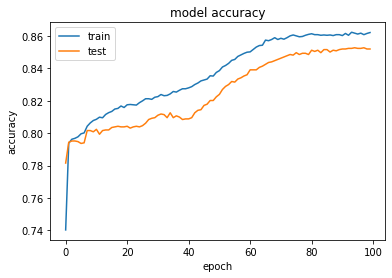

In [23]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

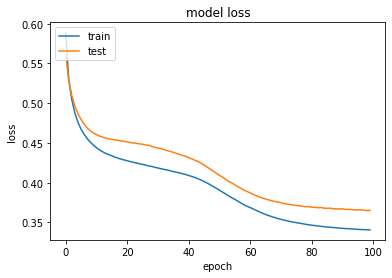

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 211,  194]])

In [32]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86